# Students performance in exams

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("../input/StudentsPerformance.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print (data.shape)

(1000, 8)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


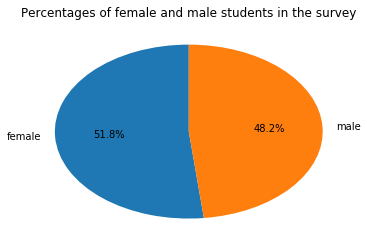

In [8]:
gender_P = data.gender.value_counts()
plt.title("Percentages of female and male students in the survey")
plt.pie(gender_P, labels=gender_P.index, autopct='%1.1f%%', startangle=90);

In [9]:

data["Average"] = (data["math score"] + data["reading score"] + data["writing score"]) / 3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [10]:
def Grade(a):
    if a >= 90:
        grade = 'A'
    elif a >= 80:
        grade = 'B'
    elif a >= 70:
        grade = 'C'
    elif a >= 50:
        grade = 'D'
    else:
        grade = 'F'
    return grade
        
        
data["Grade_math"] = data["math score"].apply(lambda s: Grade(s))
data["Grade_reading"] = data["reading score"].apply(lambda s: Grade(s))
data["Grade_writing"] = data["writing score"].apply(lambda s: Grade(s))
data["Overall_grade"] = data["Average"].apply(lambda s: Grade(s))
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,Grade_math,Grade_reading,Grade_writing,Overall_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C,C,C,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,D,A,B,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F,D,F,F
4,male,group C,some college,standard,none,76,78,75,76.333333,C,C,C,C


In [11]:
data.Grade_math.value_counts()

D    456
C    216
B    135
F    135
A     58
Name: Grade_math, dtype: int64

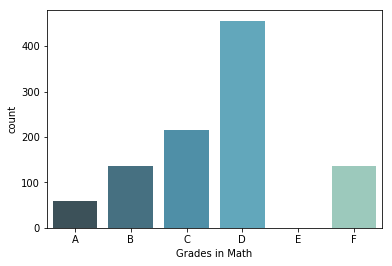

In [12]:
order_grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_math", data = data, order = order_grade, palette = "GnBu_d")
_ = plt.xlabel("Grades in Math")

In [13]:
data.Grade_reading.value_counts()

D    397
C    264
B    170
F     90
A     79
Name: Grade_reading, dtype: int64

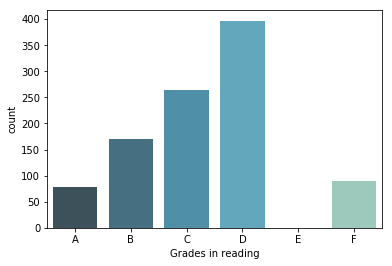

In [14]:
sns.countplot(x= "Grade_reading",data = data, order = order_grade, palette = "GnBu_d")
_ = plt.xlabel("Grades in reading")

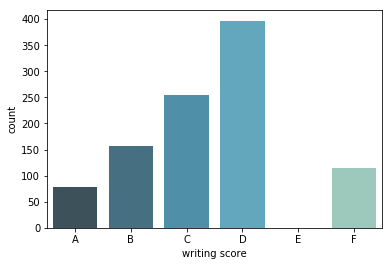

In [15]:
sns.countplot(x = 'Grade_writing', order = order_grade, data = data, palette ="GnBu_d")
_ = plt.xlabel("writing score")

In [16]:
data.Overall_grade.value_counts()

D    438
C    261
B    146
F    103
A     52
Name: Overall_grade, dtype: int64

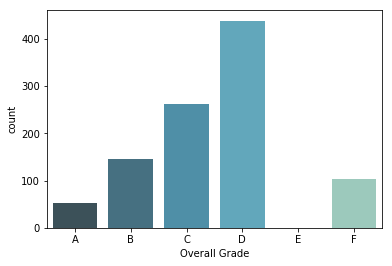

In [17]:
sns.countplot(x = 'Overall_grade', order = order_grade, data = data, palette ="GnBu_d")
_ = plt.xlabel("Overall Grade")

In [18]:
r = np.corrcoef(data["reading score"], data["writing score"])[0, 1]
print(r)

0.9545980771462476


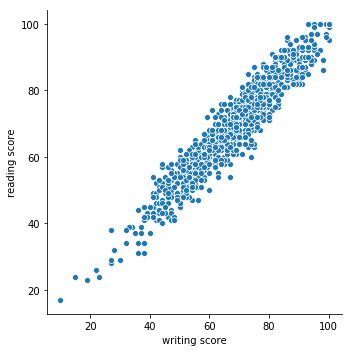

In [19]:
sns.relplot(x='writing score', y = 'reading score', data = data)

In [20]:
data["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [21]:
data["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

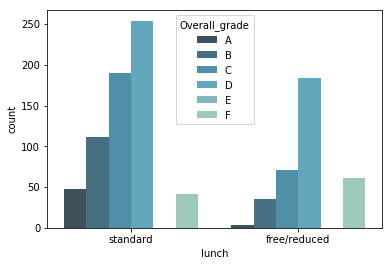

In [22]:
sns.countplot(x = "lunch", data = data, hue = "Overall_grade", hue_order = ["A","B","C","D","E","F"], palette = "GnBu_d")

In [23]:
data["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

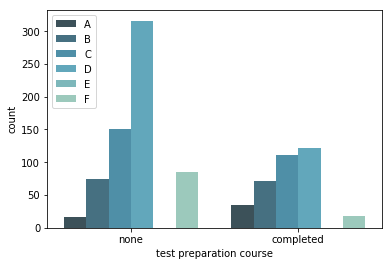

In [24]:
sns.countplot(x = "test preparation course", hue = "Overall_grade",data = data, hue_order = order_grade, palette = 'GnBu_d')
_ = plt.legend()

In [25]:
data["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [26]:
data["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

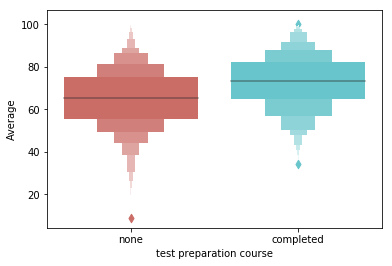

In [27]:
sns.boxenplot(x='test preparation course', y='Average',data = data, palette = "hls")

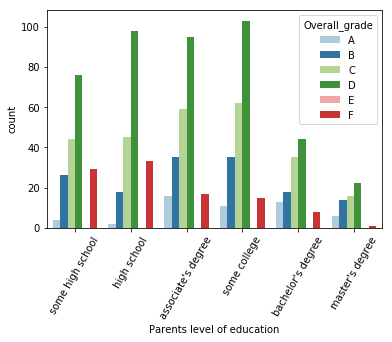

In [28]:
order_edu = ['some high school','high school',"associate's degree","some college","bachelor's degree","master's degree"]
p = sns.countplot(x='parental level of education', hue='Overall_grade',data=data, order= order_edu, hue_order = order_grade, palette = 'Paired')
_ = plt.xlabel('Parents level of education')
_ = plt.setp(p.get_xticklabels(), rotation = 60)

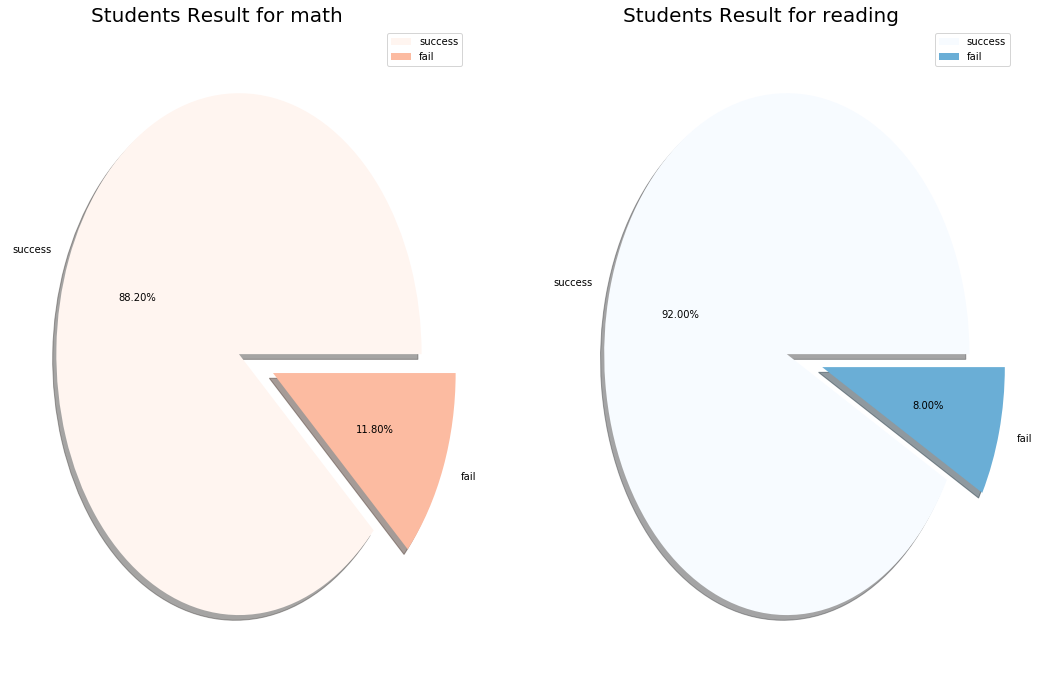

In [29]:
passmarks = 49
plt.rcParams['figure.figsize'] =(18,12)

#creating a new column pass*** this will tell us whether the student are pass or fail
data['pass_math']=np.where(data['math score']<passmarks,'Fail','success')
data['pass_reading']=np.where(data['reading score']<passmarks,'Fail','success')
data['pass_writing']=np.where(data['writing score']<passmarks,'Fail','success')
data['pass_Overall']=np.where(data['Average']<passmarks,'Fail','success')

#represent the ratio of pass and fail 
size = data['pass_math'].value_counts()
colors = plt.cm.Reds(np.linspace(0,1,5))
labels = "success","fail"
explode = [0,0.2]
plt.subplot(1,2,1)
plt.pie(size,colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for math       ', fontsize = 20)
plt.legend()

#represent the ratio of pass and fail 
size = data['pass_reading'].value_counts()
colors = plt.cm.Blues(np.linspace(0,1,3))
labels = "success","fail"
explode = [0,0.2]
plt.subplot(1,2,2)
plt.pie(size,colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for reading        ', fontsize = 20)
plt.legend()



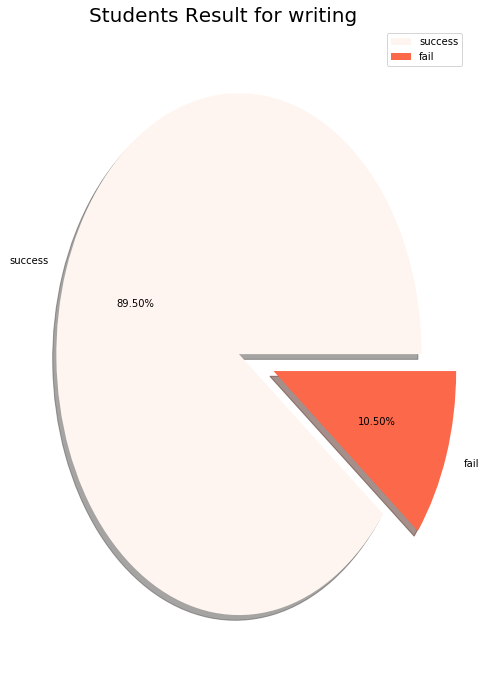

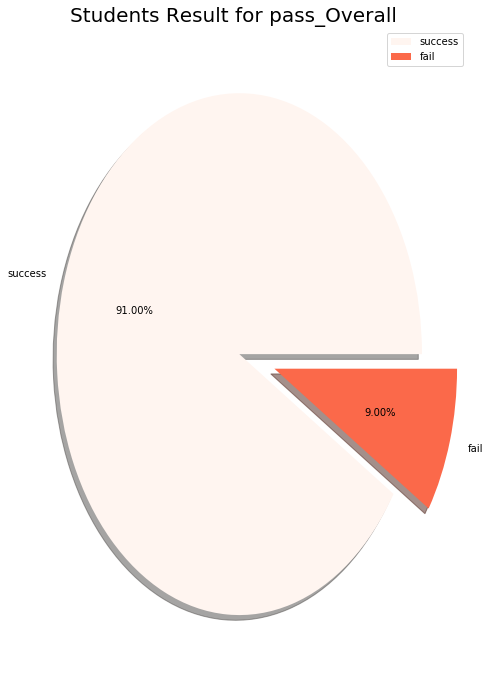

In [30]:
#represent the ratio of pass and fail 
size = data['pass_writing'].value_counts()
colors = plt.cm.Reds(np.linspace(0,1,3))
labels = "success","fail"
explode = [0,0.2]
plt.subplot(1,2,1)
plt.pie(size,colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for writing     ', fontsize = 20)
plt.legend()
plt.show()
#represent the ratio of pass and fail 
size = data['pass_Overall'].value_counts()
colors = plt.cm.Reds(np.linspace(0,1,3))
labels = "success","fail"
explode = [0,0.2]
plt.subplot(1,2,2)
plt.pie(size,colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for pass_Overall  ', fontsize = 20)
plt.legend()


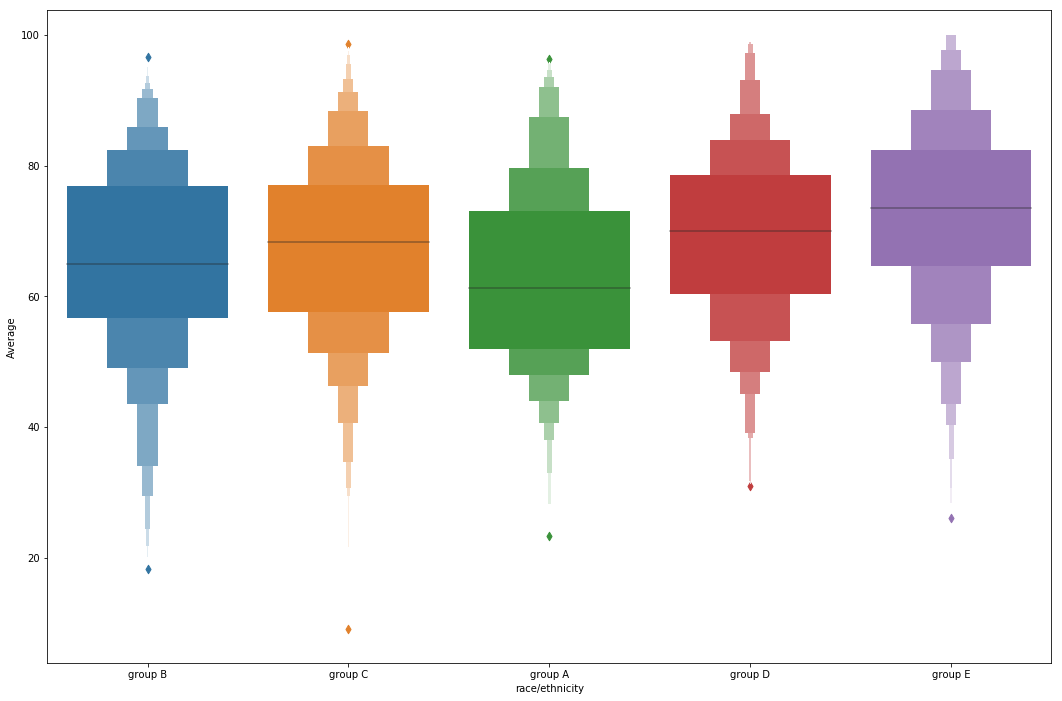

In [31]:
sns.boxenplot(x="race/ethnicity", y="Average", data=data)

## Preprocessing

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#label encoding for test preparation course 
data['test preparation course'] = le.fit_transform(data['test preparation course'])
#label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

In [33]:
data['race/ethnicity'] = data['race/ethnicity'].replace('group A',1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B',2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C',3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D',4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E',5)
data['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [34]:
data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['parental level of education'].value_counts()

4    226
0    222
2    196
5    179
1    118
3     59
Name: parental level of education, dtype: int64

In [35]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,Grade_math,Grade_reading,Grade_writing,Overall_grade,pass_math,pass_reading,pass_writing,pass_Overall
0,female,2,1,1,1,72,72,74,72.666667,C,C,C,C,success,success,success,success
1,female,3,4,1,0,69,90,88,82.333333,D,A,B,B,success,success,success,success
2,female,2,3,1,1,90,95,93,92.666667,A,A,A,A,success,success,success,success
3,male,1,0,0,1,47,57,44,49.333333,F,D,F,F,Fail,success,Fail,success
4,male,3,4,1,1,76,78,75,76.333333,C,C,C,C,success,success,success,success


In [36]:
#encoding for gender
data['gender'] = le.fit_transform(data['gender'])
#encoding for pass math
data['pass_math'] = le.fit_transform(data['pass_math'])
#encoding for pass reading
data['pass_reading'] = le.fit_transform(data['pass_reading'])
#encoding for pass reading
data['pass_writing'] = le.fit_transform(data['pass_writing'])
data['pass_Overall'] = le.fit_transform(data['pass_Overall'])

In [37]:
data['Grade_math'] = data['Grade_math'].replace('O',0)
data['Grade_math'] = data['Grade_math'].replace('A',1)
data['Grade_math'] = data['Grade_math'].replace('B',2)
data['Grade_math'] = data['Grade_math'].replace('C',3)
data['Grade_math'] = data['Grade_math'].replace('D',4)
data['Grade_math'] = data['Grade_math'].replace('F',5)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,Grade_math,Grade_reading,Grade_writing,Overall_grade,pass_math,pass_reading,pass_writing,pass_Overall
0,0,2,1,1,1,72,72,74,72.666667,3,C,C,C,1,1,1,1
1,0,3,4,1,0,69,90,88,82.333333,4,A,B,B,1,1,1,1
2,0,2,3,1,1,90,95,93,92.666667,1,A,A,A,1,1,1,1
3,1,1,0,0,1,47,57,44,49.333333,5,D,F,F,0,1,0,1
4,1,3,4,1,1,76,78,75,76.333333,3,C,C,C,1,1,1,1


In [38]:
data['Grade_reading'] = data['Grade_reading'].replace('O',0)
data['Grade_reading'] = data['Grade_reading'].replace('A',1)
data['Grade_reading'] = data['Grade_reading'].replace('B',2)
data['Grade_reading'] = data['Grade_reading'].replace('C',3)
data['Grade_reading'] = data['Grade_reading'].replace('D',4)
data['Grade_reading'] = data['Grade_reading'].replace('F',5)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,Grade_math,Grade_reading,Grade_writing,Overall_grade,pass_math,pass_reading,pass_writing,pass_Overall
0,0,2,1,1,1,72,72,74,72.666667,3,3,C,C,1,1,1,1
1,0,3,4,1,0,69,90,88,82.333333,4,1,B,B,1,1,1,1
2,0,2,3,1,1,90,95,93,92.666667,1,1,A,A,1,1,1,1
3,1,1,0,0,1,47,57,44,49.333333,5,4,F,F,0,1,0,1
4,1,3,4,1,1,76,78,75,76.333333,3,3,C,C,1,1,1,1


In [39]:
data['Grade_reading'] = data['Grade_reading'].replace('O',0)
data['Grade_reading'] = data['Grade_reading'].replace('A',1)
data['Grade_reading'] = data['Grade_reading'].replace('B',2)
data['Grade_reading'] = data['Grade_reading'].replace('C',3)
data['Grade_reading'] = data['Grade_reading'].replace('D',4)
data['Grade_reading'] = data['Grade_reading'].replace('F',5)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,Grade_math,Grade_reading,Grade_writing,Overall_grade,pass_math,pass_reading,pass_writing,pass_Overall
0,0,2,1,1,1,72,72,74,72.666667,3,3,C,C,1,1,1,1
1,0,3,4,1,0,69,90,88,82.333333,4,1,B,B,1,1,1,1
2,0,2,3,1,1,90,95,93,92.666667,1,1,A,A,1,1,1,1
3,1,1,0,0,1,47,57,44,49.333333,5,4,F,F,0,1,0,1
4,1,3,4,1,1,76,78,75,76.333333,3,3,C,C,1,1,1,1


In [40]:
data['Grade_writing'] = data['Grade_writing'].replace('O',0)
data['Grade_writing'] = data['Grade_writing'].replace('A',1)
data['Grade_writing'] = data['Grade_writing'].replace('B',2)
data['Grade_writing'] = data['Grade_writing'].replace('C',3)
data['Grade_writing'] = data['Grade_writing'].replace('D',4)
data['Grade_writing'] = data['Grade_writing'].replace('F',5)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,Grade_math,Grade_reading,Grade_writing,Overall_grade,pass_math,pass_reading,pass_writing,pass_Overall
0,0,2,1,1,1,72,72,74,72.666667,3,3,3,C,1,1,1,1
1,0,3,4,1,0,69,90,88,82.333333,4,1,2,B,1,1,1,1
2,0,2,3,1,1,90,95,93,92.666667,1,1,1,A,1,1,1,1
3,1,1,0,0,1,47,57,44,49.333333,5,4,5,F,0,1,0,1
4,1,3,4,1,1,76,78,75,76.333333,3,3,3,C,1,1,1,1


In [41]:
data['Overall_grade'] = data['Overall_grade'].replace('O',0)
data['Overall_grade'] = data['Overall_grade'].replace('A',1)
data['Overall_grade'] = data['Overall_grade'].replace('B',2)
data['Overall_grade'] = data['Overall_grade'].replace('C',3)
data['Overall_grade'] = data['Overall_grade'].replace('D',4)
data['Overall_grade'] = data['Overall_grade'].replace('F',5)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,Grade_math,Grade_reading,Grade_writing,Overall_grade,pass_math,pass_reading,pass_writing,pass_Overall
0,0,2,1,1,1,72,72,74,72.666667,3,3,3,3,1,1,1,1
1,0,3,4,1,0,69,90,88,82.333333,4,1,2,2,1,1,1,1
2,0,2,3,1,1,90,95,93,92.666667,1,1,1,1,1,1,1,1
3,1,1,0,0,1,47,57,44,49.333333,5,4,5,5,0,1,0,1
4,1,3,4,1,1,76,78,75,76.333333,3,3,3,3,1,1,1,1


In [42]:
data['Overall_grade'] = data['Overall_grade'].replace('O',0)
data['Overall_grade'] = data['Overall_grade'].replace('A',1)
data['Overall_grade'] = data['Overall_grade'].replace('B',2)
data['Overall_grade'] = data['Overall_grade'].replace('C',3)
data['Overall_grade'] = data['Overall_grade'].replace('D',4)
data['Overall_grade'] = data['Overall_grade'].replace('F',5)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,Grade_math,Grade_reading,Grade_writing,Overall_grade,pass_math,pass_reading,pass_writing,pass_Overall
0,0,2,1,1,1,72,72,74,72.666667,3,3,3,3,1,1,1,1
1,0,3,4,1,0,69,90,88,82.333333,4,1,2,2,1,1,1,1
2,0,2,3,1,1,90,95,93,92.666667,1,1,1,1,1,1,1,1
3,1,1,0,0,1,47,57,44,49.333333,5,4,5,5,0,1,0,1
4,1,3,4,1,1,76,78,75,76.333333,3,3,3,3,1,1,1,1


In [43]:
x= data.iloc[:,:14]
y = data.iloc[:,16]
print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 14)
(200, 14)
(800,)
(200,)


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [46]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
y_pred  =  classifier.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [49]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
x_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


98.5

In [50]:
print(data.columns.values)

['gender' 'race/ethnicity' 'parental level of education' 'lunch'
 'test preparation course' 'math score' 'reading score' 'writing score'
 'Average' 'Grade_math' 'Grade_reading' 'Grade_writing' 'Overall_grade'
 'pass_math' 'pass_reading' 'pass_writing' 'pass_Overall']


In [51]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,Grade_math,Grade_reading,Grade_writing,Overall_grade,pass_math,pass_reading,pass_writing,pass_Overall
0,0,2,1,1,1,72,72,74,72.666667,3,3,3,3,1,1,1,1
1,0,3,4,1,0,69,90,88,82.333333,4,1,2,2,1,1,1,1
2,0,2,3,1,1,90,95,93,92.666667,1,1,1,1,1,1,1,1
3,1,1,0,0,1,47,57,44,49.333333,5,4,5,5,0,1,0,1
4,1,3,4,1,1,76,78,75,76.333333,3,3,3,3,1,1,1,1


In [52]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,Grade_math,Grade_reading,Grade_writing,Overall_grade,pass_math,pass_reading,pass_writing,pass_Overall
995,0,5,3,1,0,88,99,95,94.000000,2,1,1,1,1,1,1,1
996,1,3,2,0,1,62,55,55,57.333333,4,4,4,4,1,1,1,1
997,0,3,2,0,0,59,71,65,65.000000,4,3,4,4,1,1,1,1
998,0,4,4,1,0,68,78,77,74.333333,4,3,3,3,1,1,1,1
999,0,4,4,0,1,77,86,86,83.000000,3,2,2,2,1,1,1,1


In [53]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

99.38

In [54]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

99.12

In [55]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

98.5

In [56]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [57]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

100.0

In [58]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest,acc_gaussian,
               acc_decision_tree]})
models.sort_values(by='Score', ascending=True)

,Model,Score
2,Logistic Regression,98.50
4,Naive Bayes,98.50
1,KNN,99.12
0,Support Vector Machines,99.38
3,Random Forest,100.00
5,Decision Tree,100.00
